<font style='font-size:1.5em'>**💻 W07 Lab Notebook**</font><br>
<font style='font-size:1.3em;color:#888888'>Normalising JSON + the Groupby -> Apply -> Combine Strategy </font>

<font style='font-size:1.2em'>LSE [DS105A](https://lse-dsi.github.io/DS105/autumn-term/index.html){style="color:#e26a4f;font-weight:bold"} – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 15 November 2024 
</div>


**CREATORS:**  

- [Alex Soldatkin](https://github.com/alex-soldatkin) provided the dataset, the use case and a starting code
- Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io) adjusted the content to meet the lecture more closely

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: Practice normalising JSON data and using the groupby -> apply -> combine strategy to aggregate data.

**REFERENCES:**

- The [`pd.json_normalize()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) to convert JSON data more easily into tabular format

- The [DataFrame.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) function to handle cases when columns are made out of lists

In the labs later (second notebook), we will also cover:

- The [DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) function, combined with apply() and agg() to aggregate data 

---

<div style="background-color:white;padding:0.5em;margin-left:2em;margin-bottom:1em;border-radius:0.5em;font-family: monospace;border: 1px solid #eda291;font-size:1.05em;width:500px">

💽 **DATA SPECIFICATION CARD:**

<font style="font-size:0.8em">We're going to use data from the [OpenSanctions](https://www.opensanctions.org/) project. This dataset includes information about individuals and entities that governments and international organizations have sanctioned worldwide. OpenSanctions is operated by a German company, [OpenSanctions Datenbanken GmbH](https://www.opensanctions.org/docs/about/), and has received funding from the German Federal Ministry for Education and Research. They offer a paid API for accessing the data, but you can also download the [data in bulk](https://www.opensanctions.org/datasets/sanctions/) for free, for academic and research purposes.</font>

A few things to know about the dataset:

- **We are focusing on Targets.** These are the individuals and entities that have been sanctioned. This dataset includes information about the name, country, and other 'properties' of the targets.

- **We have filtered for Russian Targets.** This in part because Alex, who provided us with the data sample for this lab, is doing a PhD where he focuses on studying Russia, and also because the dataset is large and we want to make it more manageable for this lab.

- **We are using a small random sample.** Again, this is to make the dataset more manageable for this lab. The full dataset is much larger. 

</div>

In [1]:
# To convert files to a suitable Python format (list or dictionary)
import json

import numpy as np
import pandas as pd

from IPython.display import Image

# 1. Let's normalise the JSON data

- You can work alone or in small groups for this. 

- If you want, feel free to play a game of <span style="display: inline-block; padding: 0 7.5px; font-size: 12px; font-weight: bold; line-height: 18px; white-space: nowrap; border: 1px solid rgba(20, 18, 11, 0.75); border-radius: 0.5em; color: rgb(20, 18, 11); background-color: rgba(255, 255, 255, 0.75); vertical-align: top; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1)"> 🧑‍✈️ Pilot</span> and <span style="display: inline-block; padding: 0 7.5px; font-size: 12px; font-weight: bold; line-height: 18px; white-space: nowrap; border: 1px solid rgba(20, 18, 11, 0.75); border-radius: 0.5em; color: #ac831d; background-color: rgba(255, 255, 255, 0.75); vertical-align: top; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1)">🙋 Copilot (s)</span> like we've done in the past.

Treat everything that comes below as 🎯 **ACTION POINTS:**


## 1.1 Read JSON data into a Python object

We have a JSON file called `data/sample_single_target.json` that contains information about a single target of sanctions.

Run the code below that reads the data from the file into a suitable Python object (either list or dictionary):

In [3]:
import os
# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

c:\Users\KEARNEY2\Dropbox\Github\DS105a_v2\ds105a-2024\W07-CLK-Practice\notebooks


In [4]:
with open('../data/opensanctions/sample_single_target.json', mode='r') as file:
    sample_target = json.load(file)

## 1.2 Explore the JSON data:

Either browse the file or print the object you read the JSON data into to understand its structure.

**Questions:**

1. What is the type of the object that you read the JSON data into?

    My answer: 

    > `dict`

2. Is this a flat or nested JSON object?

    My answer: 

    > Nested, the values associated with some of the keys are themselves dictionaries.

3. Can this object be converted into a DataFrame directly (with `pd.DataFrame()`), or do we need to do some pre-processing first?

    My answer: 

    > We get an error, the arrays are not of the same length

In [7]:
print(type(sample_target))
print(sample_target.keys())
print(sample_target)

<class 'dict'>
dict_keys(['id', 'caption', 'schema', 'properties', 'referents', 'datasets', 'first_seen', 'last_seen', 'last_change', 'target'])
{'id': 'Q61116762', 'caption': 'Aleksey Mikhailovich SALYAEV', 'schema': 'Person', 'properties': {'alias': ['САЛЯЕВ Алексей Михайлович', 'Alexei Mikhailovich SALYAYEV', 'Alekseii Mikhailovich Saliaiev', 'Aleksey Mikhailovich Saliaiev', 'Alexei Mikhailovich Saliaiev', 'Oleksii SALYAYEV', 'Aleksey Mikhailovich SALYAYEV', 'Oleksii Mykhailovych SALYAYEV', 'Salyayev Aleksey Mikhailovich', 'SALIAIEV', 'Саляєв Олексій Михайлович', 'Saliaiev Oleksii', 'Alexei Mikhailovich Salyaev', 'Oleksii Mykhailovych Salyaev', 'Саляев Алексей Михайлович', 'Aleksey Mikhailovich Salyaev', 'Aleksei'], 'name': ['Alexei Mikhailovich SALYAYEV', 'Aleksey Mikhailovich Saliaiev', 'Aleksey Mikhailovich Salyaev', 'Saliaiev Oleksii Mykhailovych', 'Oleksii Mykhailovych SALYAYEV', 'Aleksey Mikhailovich SALYAYEV', 'Саляєв Олексій Михайлович', 'Alexei Mikhailovich Salyaev', 'Aleks

In [9]:
# enumerate the keys and values in the sample_target dictionary
for key, value in sample_target.items():
    print(f"Key: {key}, Value type: {type(value)}")

Key: id, Value type: <class 'str'>
Key: caption, Value type: <class 'str'>
Key: schema, Value type: <class 'str'>
Key: properties, Value type: <class 'dict'>
Key: referents, Value type: <class 'list'>
Key: datasets, Value type: <class 'list'>
Key: first_seen, Value type: <class 'str'>
Key: last_seen, Value type: <class 'str'>
Key: last_change, Value type: <class 'str'>
Key: target, Value type: <class 'bool'>


In [11]:
# Attempt to convert the sample_target dictionary to a DataFrame
# This will likely fail if the dictionary is nested
df = pd.DataFrame(sample_target)


ValueError: All arrays must be of the same length

## 1.3 Normalise the JSON data

- Convert the JSON data into a DataFrame using the `pd.json_normalize()` function.

- Store the resulting DataFrame in a variable called `df_sample`.

You should see something like this:

In [ ]:
# Your code here
df_sample = pd.json_normalize(sample_target)

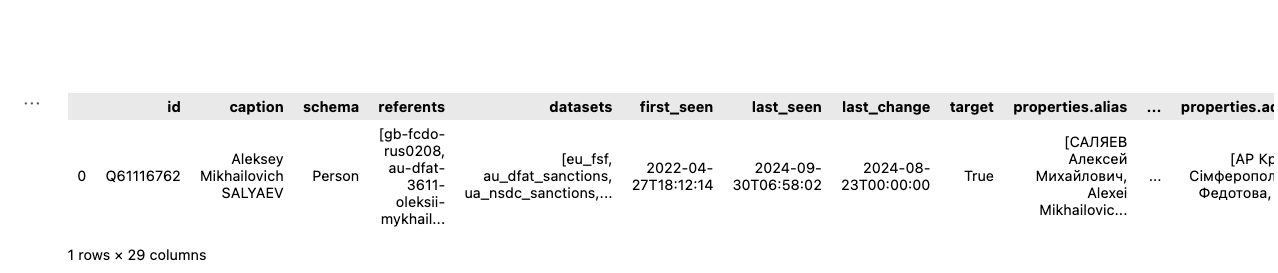

In [12]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v1.png")

## 1.4 Subset for the most interesting `properties` columns

We want to focus on the following properties:

| Property                  | Description                                                                                     | Type   |
|---------------------------|-------------------------------------------------------------------------------------------------|--------|
| `properties.alias`        | The different names that the target is known by.                                                | List   |
| `properties.nationality`  | The nationality(ies) of the target.                                                             | List   |
| `properties.birthCountry` | The country where the target was born. This is stored as a list but should have only one element.| List   |
| `properties.sourceUrl`    | The URL where the information about the target was sourced from. This is stored as a list but should have only one element. | List   |
| `properties.sanctions`    | The sanctions that the target is subject to.                                                    | List   |


- Save the names of the columns above to a list called `interesting_columns`.

- Subset the DataFrame to keep only the columns listed above.

- Replace the `df_sample` variable with the new DataFrame that contains only the interesting columns.

💡 **TIP:** If you have GitHub Copilot installed on your machine, try adding the instructions above to the AI and see if it produces the output you want.

In [5]:
# Uncomment the cell below to see what your DataFrame should look like
# Image("../figures/opensanctions/df_sample_v2.png")

In [18]:
# Your code here
# Save names of the columns for interesting_columns
interesting_columns = ['properties.alias',
                       'properties.nationality',
                       'properties.sanctions',
                       'properties.birthCountry',
                       'properties.sourceUrl',
                       ]

In [19]:
# Subset the DataFrame to only include the interesting columns
df_interesting = df_sample[interesting_columns]

In [20]:
df_interesting.head()

,properties.alias,properties.nationality,properties.sanctions,properties.birthCountry,properties.sourceUrl
0,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",[ru],[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...,[ua],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...


In [21]:
df_sample = df_interesting

## 1.5 Rename the columns

Let's get rid of the `properties.` prefix in the column names.

If you created the `interesting_columns` list and the `df_sample` correctly, you can run the code below to rename the columns. 

Cut this piece of code and paste it in the cell below:

```python
new_column_names = [col.split('.')[1] for col in interesting_properties]

# Here's a new way to rename columns
df_sample.columns = new_column_names
```

In [24]:
# Your code here
# Keep only what is after the dot in the column names
new_column_names = [col.split('.')[1] for col in interesting_columns]
print(new_column_names)
# Save over the old column names
df_sample.columns = new_column_names

['alias', 'nationality', 'sanctions', 'birthCountry', 'sourceUrl']


## 🏆 1.6 String Manipulation (Don't explode anything just yet)

We are interested in understanding which countries/entities have imposed sanctions on the target. This means the only column we want to explode is the `properties.sanctions` column. 

All the other columns, despite being lists, should not be exploded. It makes a lot more sense to just convert them to meaningful strings.

We can use the `apply()` function on each of these columns to convert the lists into strings.

Here's, for example, how I would convert the `birth_country` column from a list to a string:

```python
# Because I know the `birthCountry` column is a list that has just a single element, 
# I can extract it directly like this.
# Run it and check the result before assigning it back to the column
df_sample['birthCountry'].apply(lambda x: x[0])

# To make this change permanent, assign it back to the column
df_sample['birthCountry'] = df_sample['birthCountry'].apply(lambda x: x[0])

```


In [25]:
df_sample['birthCountry'].apply(lambda x: x[0])

0    ua
Name: birthCountry, dtype: object

In [ ]:
# Convert the birthCountry column to a single string
df_sample['birthCountry'] = df_sample['birthCountry'].apply(lambda x: x[0])


In [ ]:
# Similarly, grab just the first name from the alias list
df_sample['alias'] = df_sample['alias'].apply(lambda x: x[0])

In [37]:
# Similarly, grab just the first URL from the sourceUrl list
df_sample['sourceUrl'] = df_sample['sourceUrl'].apply(lambda x: x[0])

In [40]:
#TODO: Use the ", ".join() function to convert the list of nationalities to a single string that separates all the nationalities with a comma and a space

df_sample['nationality'] = df_sample['nationality'].apply(lambda x: ', '.join(x))


In [42]:
df_sample.head()

,alias,nationality,sanctions,birthCountry,sourceUrl
0,САЛЯЕВ Алексей Михайлович,ru,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...


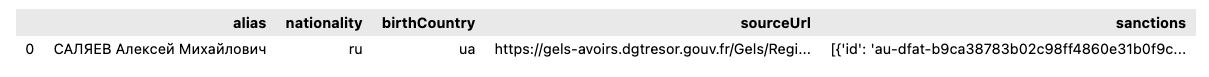

In [41]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v3.png")

In [44]:
# Check the dimensions of the DataFrame
print(df_sample.shape)

(1, 5)


## 1.7 Explode the columns

- Use the [DataFrame.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) function to explode the `sanctions` column.

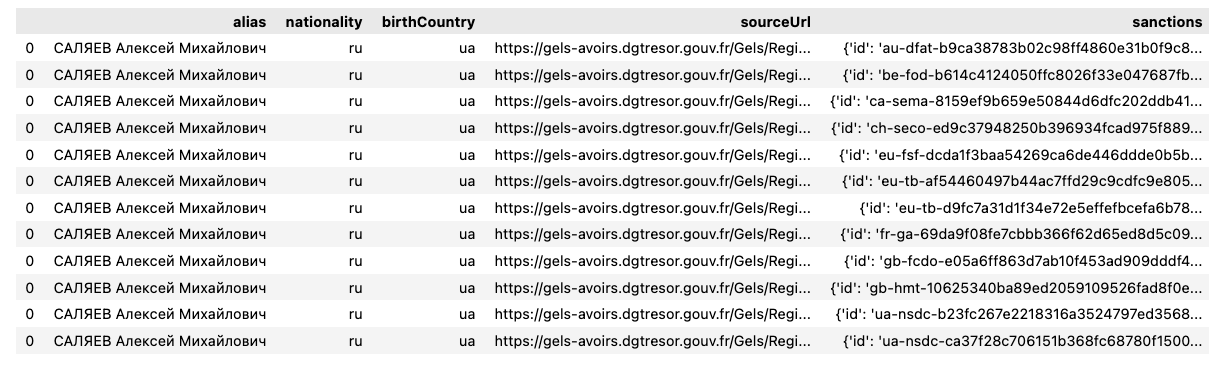

In [43]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v4.png")

In [46]:
# Your code here
df_sample.explode('sanctions')

,alias,nationality,sanctions,birthCountry,sourceUrl
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c8...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'be-fod-b614c4124050ffc8026f33e047687fb...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'ca-sema-8159ef9b659e50844d6dfc202ddb41...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'ch-seco-ed9c37948250b396934fcad975f889...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'eu-fsf-dcda1f3baa54269ca6de446ddde0b5b...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'eu-tb-af54460497b44ac7ffd29c9cdfc9e805...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'fr-ga-69da9f08fe7cbbb366f62d65ed8d5c09...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'gb-fcdo-e05a6ff863d7ab10f453ad909dddf4...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,{'id': 'gb-hmt-10625340ba89ed2059109526fad8f0e...,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...


# 1.8. See the solution

Putting it all together, here's what the solution would look like if you were to use method-chaining:

<details><summary>Click HERE for the solution</summary>

```python
interesting_columns = ['properties.alias', 
                       'properties.nationality', 
                       'properties.birthCountry', 
                       'properties.sourceUrl', 
                       'properties.sanctions']

with open('../data/opensanctions/sample_single_target.json', mode='r') as file:
    sample_target = json.load(file)

df_sample = (
    pd.json_normalize(sample_target)
    [interesting_columns]
    .rename(columns={
        'properties.alias': 'alias',
        'properties.nationality': 'nationality',
        'properties.birthCountry': 'birthCountry',
        'properties.sourceUrl': 'sourceUrl',
        'properties.sanctions': 'sanctions'
    })
    .assign(
        alias=lambda x: x['alias'].apply(lambda x: x[0]),
        sourceUrl=lambda x: x['sourceUrl'].apply(lambda x: x[0]),
        nationality=lambda x: x['nationality'].apply(lambda x: ", ".join(x)),
        birthCountry=lambda x: x['birthCountry'].apply(lambda x: x[0])
    )
    .explode('sanctions')
)

df_sample
```

In [51]:
df_sample['sanctions'][0][0]

{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c80056c953c0',
 'caption': 'Autonomous (Ukraine)',
 'schema': 'Sanction',
 'properties': {'entity': ['Q61116762'],
  'sourceUrl': ['https://www.dfat.gov.au/international-relations/security/sanctions/Pages/sanctions'],
  'program': ['Autonomous (Ukraine)'],
  'startDate': ['2019-03-16'],
  'country': ['au'],
  'summary': ['Listed on: 16 Mar. 2019'],
  'authority': ['Department of Foreign Affairs and Trade']},
 'referents': [],
 'datasets': ['au_dfat_sanctions'],
 'first_seen': '2023-04-20T12:10:15',
 'last_seen': '2024-09-30T06:02:03',
 'last_change': '2024-06-23T20:02:02',
 'target': False}

In [53]:
df_sample.explode('sanctions'). explode('sanctions')

,alias,nationality,sanctions,birthCountry,sourceUrl
0,САЛЯЕВ Алексей Михайлович,ru,id,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,caption,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,schema,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,properties,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,referents,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
...,...,...,...,...,...
0,САЛЯЕВ Алексей Михайлович,ru,datasets,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,first_seen,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,last_seen,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...
0,САЛЯЕВ Алексей Михайлович,ru,last_change,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...


# 2. Unnest the `sanctions` column

We have a lot of stuff but our `sanctions` column is still nested.

We can't explode it, as the data inside is not a list, but a dictionary.

Give it a go:

```python
# This won't work. Explode only works with lists
df_sample.explode('sanctions')
```

We need to:

- Keep the other columns as they are
- Work separately on the `sanctions` column, using the `pd.json_normalize()` function to normalise the data inside it.
- Concatenate the resulting DataFrame with the original one, keeping the index aligned.

## 2.1 Convert the entire `sanctions` column into a DataFrame of its own

For this to work, we first need to convert the 'sanctions' column back to a 'pure Python' list of dictionaries

```python
# You can normalise a pandas column when they are lists of dictionaries
# json_normalise is not just for 'pure Python' lists of dictionaries
pd.json_normalize(df_sample['sanctions'])
```

Copy the code above and paste it in the cell below to observe the output.

In [54]:
# Your code here
pd.json_normalize(df_sample['sanctions'])

,0,1,2,3,4,5,6,7,8,9,10,11
0,{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c8...,{'id': 'be-fod-b614c4124050ffc8026f33e047687fb...,{'id': 'ca-sema-8159ef9b659e50844d6dfc202ddb41...,{'id': 'ch-seco-ed9c37948250b396934fcad975f889...,{'id': 'eu-fsf-dcda1f3baa54269ca6de446ddde0b5b...,{'id': 'eu-tb-af54460497b44ac7ffd29c9cdfc9e805...,{'id': 'eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78...,{'id': 'fr-ga-69da9f08fe7cbbb366f62d65ed8d5c09...,{'id': 'gb-fcdo-e05a6ff863d7ab10f453ad909dddf4...,{'id': 'gb-hmt-10625340ba89ed2059109526fad8f0e...,{'id': 'ua-nsdc-b23fc267e2218316a3524797ed3568...,{'id': 'ua-nsdc-ca37f28c706151b368fc68780f1500...


From the resulting DataFrame above, we definitely want the `properties.country` (renamed to just `sanction_country`), but we want it as a string, not as a list.

Figure out how to create this column and add it to the DataFrame.

In [16]:
# TODO: Write some code until I can add a df_sample['sanction_country'] column to the DataFrame

In [17]:
## Uncomment the cell below to see what your DataFrame should look like
# Image("../figures/opensanctions/df_sample_v5.png")

# 3. A larger dataset

Let's use a much larger dataset now. Small tweaks to the code are necessary, as some of the data is missing plus we have more than one target.

In [18]:
# This is a list of JSON objects (each element is a JSON object like the sample we've used above)
df_targets = pd.read_json('../data/opensanctions/targets_sample_4000.jsonl', lines=True)
df_targets.head()

,id,caption,schema,properties,referents,datasets,first_seen,last_seen,last_change,target
0,NK-YPMWhnEtqnRViPgZx2ET7N,"Tovarystvo z obmezhenoiu vidpovidalnistiu ""Tek...",Organization,"{'innCode': ['5904094273'], 'jurisdiction': ['...",[ua-nsdc-24776-tovaristvo-z-obmezenou-vidpovid...,[ua_nsdc_sanctions],2023-05-25T20:13:16,2024-09-30T06:22:04,2024-03-06T18:31:06,True
1,ua-nsdc-15471-dovtaev-alihan-isajovic,Dovtaiev Alikhan Isaiovych,Person,"{'alias': ['Довтаєв Аліхан Ісайович', 'DOVTAIE...",[],[ua_nsdc_sanctions],2023-04-20T10:50:14,2024-09-30T06:22:04,2024-03-06T18:31:06,True
2,il-nbctf-9d2131feeb8917c9f53877a5c7cf1b86f0fd8cdc,468002109,CryptoWallet,"{'publicKey': ['468002109'], 'topics': ['crime...",[],[il_mod_crypto],2024-04-05T13:51:48,2024-09-30T06:02:03,2024-04-05T13:51:48,True
3,NK-djckrSBnoZYnm2PngKZRaJ,Samarchenko Svitlana Vitaliyivna,Person,"{'name': ['Samarchenko Svitlana Vitaliyivna', ...","[ua-nsdc-13365-samarcenko-svitlana-vitaliivna,...",[ua_nsdc_sanctions],2023-04-20T10:50:14,2024-09-30T06:22:04,2024-03-06T18:31:06,True
4,Q61116762,Aleksey Mikhailovich SALYAEV,Person,"{'alias': ['САЛЯЕВ Алексей Михайлович', 'Alexe...","[gb-fcdo-rus0208, au-dfat-3611-oleksii-mykhail...","[eu_fsf, au_dfat_sanctions, ua_nsdc_sanctions,...",2022-04-27T18:12:14,2024-09-30T06:58:02,2024-08-23T00:00:00,True


Just like before, we just care about the 'properties' columns, but this time we have a lot more data:

In [19]:
df_targets['properties'].head()

0    {'innCode': ['5904094273'], 'jurisdiction': ['...
1    {'alias': ['Довтаєв Аліхан Ісайович', 'DOVTAIE...
2    {'publicKey': ['468002109'], 'topics': ['crime...
3    {'name': ['Samarchenko Svitlana Vitaliyivna', ...
4    {'alias': ['САЛЯЕВ Алексей Михайлович', 'Alexe...
Name: properties, dtype: object

We can normalise the 'properties' column and work with the resulting DataFrame.


In [20]:
interesting_columns = ['alias', 'nationality', 'birthCountry', 'sourceUrl', 'sanctions']
pd.json_normalize(df_targets['properties'])[interesting_columns]

,alias,nationality,birthCountry,sourceUrl,sanctions
0,"[Limited Liability Company ""Composite Tech№log...",NaN,NaN,NaN,[{'id': 'ua-nsdc-1a55567bf27b82e85aaa21c74ed43...
1,"[Довтаєв Аліхан Ісайович, DOVTAIEV ALIKHAN]",[ru],NaN,NaN,[{'id': 'ua-nsdc-6d9d313cafb495bc2adff58623044...
2,NaN,NaN,NaN,NaN,NaN
3,"[Самарченко Светлана Витальевна, Samarchenko S...",[ua],NaN,NaN,[{'id': 'ua-nsdc-254540b0426981a248dd23ad55938...
4,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",[ru],[ua],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...
...,...,...,...,...,...
3995,"[Агафонова Наталя Миколаївна, Агафонова Наталь...",[ru],NaN,NaN,[{'id': 'ua-nsdc-640bb3ba773bf28d09c6cfa6ff3b0...
3996,NaN,[ir],NaN,[https://sanctionssearch.ofac.treas.gov/Detail...,[{'id': 'ofac-c206e06e1f947b5884af787983b6aa90...
3997,"[Ginsburg Vladimir, Гинсбург Владимир Срульеви...",[ru],NaN,NaN,[{'id': 'ua-nsdc-1298251b55b833bfbbe09baef1b3b...
3998,NaN,NaN,NaN,[https://sanctionssearch.ofac.treas.gov/Detail...,[{'id': 'ofac-16649d709282f4b69ea21d00ea9be712...


☝️ Notice how this time around there are some NaN values in the DataFrame. This is because some of the 'properties' columns are missing in some of the rows.

We need to consider this when we normalise the data!

Your task now is to **understand everything the code below does** and then **run it**.


In [21]:
# I will read this first, outside the method chain, so it's easier to see what's happening
df_targets = pd.read_json('../data/opensanctions/targets_sample_4000.jsonl', lines=True)

# I will also leave this outside the method chain, so it's easier to see what's happening
interesting_columns = ['alias', 'nationality', 'birthCountry', 'sourceUrl', 'sanctions']
df_targets = pd.json_normalize(df_targets['properties'])[interesting_columns]

# Have you seen the assign() method before? It's a very useful method to add new columns to a DataFrame
# Do you see what we're doing differently here?
df_targets = (
    df_targets
    .assign(
        alias=lambda x: x['alias'].apply(lambda x: x[0] if isinstance(x, list) else None),
        sourceUrl=lambda x: x['sourceUrl'].apply(lambda x: x[0] if isinstance(x, list) else None),
        nationality=lambda x: x['nationality'].apply(lambda x: ", ".join(x) if isinstance(x, list) else None),
        birthCountry=lambda x: x['birthCountry'].apply(lambda x: x[0] if isinstance(x, list) else None)
    )
    .explode('sanctions')
)

# Here's another way to add the 'sanction_country' column
sanction_country = pd.json_normalize(df_targets['sanctions'])['properties.country']
sanction_country = sanction_country.apply(lambda x: x[0] if isinstance(x, list) else None).tolist()
df_targets['sanction_country'] = sanction_country

df_targets = df_targets.drop(columns='sanctions')

df_targets

,alias,nationality,birthCountry,sourceUrl,sanction_country
0,"Limited Liability Company ""Composite Tech№logy""",None,None,None,ua
1,Довтаєв Аліхан Ісайович,ru,None,None,ua
1,Довтаєв Аліхан Ісайович,ru,None,None,ua
2,None,None,None,None,None
3,Самарченко Светлана Витальевна,ua,None,None,ua
...,...,...,...,...,...
3997,Ginsburg Vladimir,ru,None,None,ua
3998,None,None,None,https://sanctionssearch.ofac.treas.gov/Details...,us
3999,BABII ANNA,ua,None,None,ua
3999,BABII ANNA,ua,None,None,ua


# 4. Groupby -> Apply -> Combine

Write code to group the data by the `sanction_country` column and count the number of sanctions imposed by each country.

(If you have time, create a bar plot to visualise the results)

(If you REALLY have time, search online for the `pycountry` library and use it to convert the country codes to meaningful country names -- use pd.merge() to join the dataframes)

In [22]:
# Your code here